In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop('Cabin', axis=1)
df['Age'] = df['Age'].fillna(df['Age'].mean())
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.dropna(subset=['Embarked'], inplace=True)
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


None

In [ ]:
df = df.drop('Name', axis=1)
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
df = df.drop('Ticket', axis=1)
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
display(df['Embarked'].value_counts())

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

In [ ]:
df_encoded

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [ ]:
df = pd.concat([df, df_encoded], axis=1)


In [ ]:
df = df.drop('Embarked', axis=1)
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,False,False,True
1,2,1,1,female,38.0,1,0,71.2833,True,False,False
2,3,1,3,female,26.0,0,0,7.9250,False,False,True
3,4,1,1,female,35.0,1,0,53.1000,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,True,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,False,True


In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.7921348314606742

In [ ]:
confusion_matrix(y_test,y_pred)

array([[90, 19],
       [18, 51]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



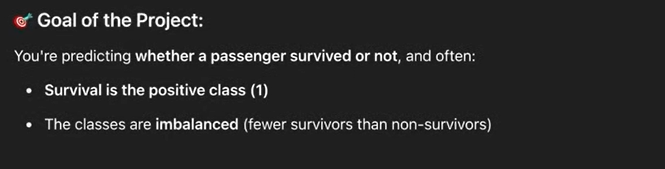

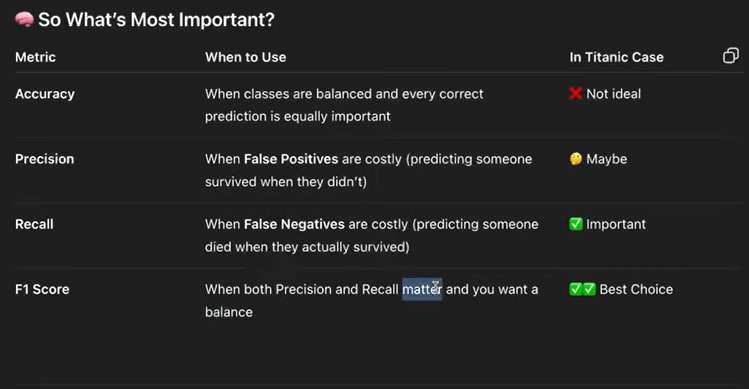

*italicized text*# KNN


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 25)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.797752808988764

In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[94, 15],
       [21, 48]])

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.76      0.70      0.73        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



## Task
Explain how to iterate through a range of k values for a KNN algorithm, evaluate the accuracy for each k, find the best k value based on accuracy, and visualize the results.

## Define a range of k values

### Subtask:
Create a list or range of integers representing the different values of 'k' to try for the KNN algorithm.


**Reasoning**:
Create a list of integers from 1 to 30 to represent the k values for the KNN model.



In [ ]:
k_values = list(range(1, 31))

## Iterate and evaluate

### Subtask:
Loop through each 'k' value in the defined range, train a KNN model with that 'k', make predictions on the test set, and calculate the accuracy score. Store the accuracy score for each 'k'.


**Reasoning**:
Iterate through the defined range of k values, train a KNN model for each k, calculate the accuracy, and store the accuracy scores in a list.



In [ ]:
accuracy_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(accuracy)

display(accuracy_scores)

[0.7415730337078652,
 0.7640449438202247,
 0.7528089887640449,
 0.7865168539325843,
 0.7865168539325843,
 0.7865168539325843,
 0.7808988764044944,
 0.797752808988764,
 0.7921348314606742,
 0.7921348314606742,
 0.7921348314606742,
 0.7921348314606742,
 0.797752808988764,
 0.8089887640449438,
 0.797752808988764,
 0.797752808988764,
 0.8033707865168539,
 0.8089887640449438,
 0.797752808988764,
 0.8033707865168539,
 0.8089887640449438,
 0.797752808988764,
 0.7865168539325843,
 0.8089887640449438,
 0.797752808988764,
 0.797752808988764,
 0.8089887640449438,
 0.8258426966292135,
 0.8146067415730337,
 0.8146067415730337]

## Find the best k

### Subtask:
Determine the 'k' value that resulted in the highest accuracy score.


**Reasoning**:
Find the index of the maximum accuracy and use it to get the best k and best accuracy score.



In [ ]:
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

print(f"Best k value: {best_k}")
print(f"Best accuracy score: {best_accuracy}")

Best k value: 28
Best accuracy score: 0.8258426966292135


## Visualize the results

### Subtask:
Plot the accuracy scores against the different 'k' values to visualize the performance of the model for each 'k'.


**Reasoning**:
Create a plot to visualize the relationship between k values and accuracy scores.



# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()

In [ ]:
model_NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_NB = model_NB.predict(X_test)

In [ ]:
y_pred_NB

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
accuracy_score(y_test,y_pred_NB)

0.7584269662921348

In [ ]:
confusion_matrix(y_test,y_pred_NB)

array([[82, 27],
       [16, 53]])

In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       109
           1       0.66      0.77      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier(random_state=12)

In [ ]:
model_DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=12)

In [ ]:
y_pred_DT = model_DT.predict(X_test_scaled)

In [ ]:
y_pred_DT

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1])

In [ ]:
accuracy_score(y_test,y_pred_DT)

0.6966292134831461

In [ ]:
confusion_matrix(y_test,y_pred_DT)

array([[76, 33],
       [21, 48]])

In [ ]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       109
           1       0.59      0.70      0.64        69

    accuracy                           0.70       178
   macro avg       0.69      0.70      0.69       178
weighted avg       0.71      0.70      0.70       178



# SVM or svclassifier




In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel = 'rbf')

In [ ]:
model_svm.fit(X_train_scaled, y_train)


SVC()

In [ ]:
y_pred_svc = model_svm.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.8146067415730337

In [ ]:
confusion_matrix(y_test,y_pred_svc)

array([[96, 13],
       [20, 49]])

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
#now Lets see what cross validation can do

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,7.2500,False,False,True
1,2,1,1,0,38.000000,1,0,71.2833,True,False,False
2,3,1,3,0,26.000000,0,0,7.9250,False,False,True
3,4,1,1,0,35.000000,1,0,53.1000,False,False,True
4,5,0,3,1,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,False,False,True
887,888,1,1,0,19.000000,0,0,30.0000,False,False,True
888,889,0,3,0,29.699118,1,2,23.4500,False,False,True
889,890,1,1,1,26.000000,0,0,30.0000,True,False,False


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model_logistic = LogisticRegression()


In [ ]:
scores = cross_val_score(model_svm, X_scaled, y, cv=5, scoring='accuracy')

# Show individual fold scores
print("Cross-validation scores for each fold:", scores)

# Show average accuracy
print("Average cross-validation accuracy:", scores.mean())

Cross-validation scores for each fold: [0.83146067 0.82022472 0.81460674 0.80898876 0.86440678]
Average cross-validation accuracy: 0.8279375357074844
